In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
data_frame_original=pd.read_csv('properatti.csv')

In [4]:
data_frame_original

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...
5,5,sell,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Argentina,Entre Ríos,3433657.0,"-33.0140714,-58.519828",-33.014071,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bop_venta_depart...,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",https://thumbs4.properati.com/6/q-w68gvaUEQVXI...
6,6,sell,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Argentina,Bs.As. G.B.A. Zona Norte,3430511.0,"-34.5329567,-58.5217825",-34.532957,...,78.0,1226.415094,1666.666667,NaN,NaN,NaN,http://www.properati.com.ar/15bor_venta_ph_mun...,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",https://thumbs4.properati.com/5/6GOXsHCyDu1aGx...
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
9,9,sell,house,Rosario,|Argentina|Santa Fe|Rosario|,Argentina,Santa Fe,3838574.0,"-32.942031,-60.7259192",-32.942031,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15box_venta_casa_r...,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,https://thumbs4.properati.com/8/RCf1YEWdF4rv98...


In [5]:
data_frame_original.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [13]:
df=data_frame_original[data_frame_original['currency']=='USD'].loc[:,['price', 'price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2']]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87587 entries, 0 to 121219
Data columns (total 6 columns):
price                    87587 non-null float64
price_aprox_usd          87587 non-null float64
surface_total_in_m2      60320 non-null float64
surface_covered_in_m2    77232 non-null float64
price_usd_per_m2         60133 non-null float64
price_per_m2             77230 non-null float64
dtypes: float64(6)
memory usage: 4.7 MB


In [23]:
len(df[df['price']!=df['price_aprox_usd']])

0

In [28]:
df[df['price_per_m2']!=df['price_usd_per_m2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69187 entries, 0 to 121217
Data columns (total 6 columns):
price                    69187 non-null float64
price_aprox_usd          69187 non-null float64
surface_total_in_m2      41920 non-null float64
surface_covered_in_m2    58832 non-null float64
price_usd_per_m2         41733 non-null float64
price_per_m2             58830 non-null float64
dtypes: float64(6)
memory usage: 3.7 MB


In [30]:
df['price_per_m2'].fillna(df['price_usd_per_m2'], inplace=True)

In [31]:
df['price_usd_per_m2'].fillna(df['price_per_m2'], inplace=True)

In [32]:
df[df['price_per_m2']!=df['price_usd_per_m2']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43410 entries, 0 to 121217
Data columns (total 6 columns):
price                    43410 non-null float64
price_aprox_usd          43410 non-null float64
surface_total_in_m2      37580 non-null float64
surface_covered_in_m2    37393 non-null float64
price_usd_per_m2         37393 non-null float64
price_per_m2             37393 non-null float64
dtypes: float64(6)
memory usage: 2.3 MB


In [33]:
tempcol=df['surface_total_in_m2']*df['price_per_m2']
tempcolusd=df['surface_total_in_m2']*df['price_usd_per_m2']

In [36]:
dfexp=df.assign(precio_calculado_1=tempcol, precio_calculado_2=tempcolusd)

In [39]:
len(dfexp[dfexp['precio_calculado_1']!=dfexp['price']])

72236

In [40]:
len(dfexp[dfexp['precio_calculado_2']!=dfexp['price']])

48018

In [51]:
len(dfexp[(dfexp['precio_calculado_2']!=dfexp['price']) & (dfexp['precio_calculado_1']!=dfexp['price'])])

48018

Observamos entonces que no hay casos en los que precio calculado a base de price_per_m2 sea correcto y el calculado a base price_usd_per_m2 no lo sea

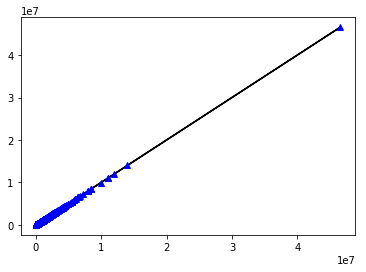

In [53]:
plt.plot(dfexp['price'], dfexp['price'], 'k-')
#plt.plot(dfexp['price'], dfexp['precio_calculado_1'], 'ro')
plt.plot(dfexp['price'], dfexp['precio_calculado_2'], 'b^')


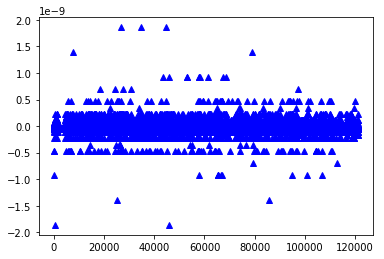

In [57]:
plt.plot(dfexp['price'] - dfexp['precio_calculado_2'], 'b^')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87587 entries, 0 to 121219
Data columns (total 6 columns):
price                    87587 non-null float64
price_aprox_usd          87587 non-null float64
surface_total_in_m2      60320 non-null float64
surface_covered_in_m2    77232 non-null float64
price_usd_per_m2         81570 non-null float64
price_per_m2             81570 non-null float64
dtypes: float64(6)
memory usage: 4.7 MB


tenemos que surface_total_in_m2 no está completo en 60320/87587

In [63]:
superficie_calculada=df['price']/df['price_usd_per_m2']
df['surface_total_in_m2'].fillna(superficie_calculada, inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87587 entries, 0 to 121219
Data columns (total 6 columns):
price                    87587 non-null float64
price_aprox_usd          87587 non-null float64
surface_total_in_m2      81757 non-null float64
surface_covered_in_m2    77232 non-null float64
price_usd_per_m2         81570 non-null float64
price_per_m2             81570 non-null float64
dtypes: float64(6)
memory usage: 4.7 MB
